# Test propensity score matching R
Use that fancy `MatchIt` package to match growth words with candidates.

Y = outcome = growth (1) or non-growth (0).

In [4]:
library('MatchIt')
library('ggplot2')

## Load data

In [16]:
tf <- read.delim('../../data/frequency/2015_2016_tf_norm.tsv', header=TRUE, sep="\t")

In [8]:
tf <- read.csv('../../data/frequency/2015_2016_tf_norm.tsv', row.names=1, sep="\t")

In [9]:
names(tf)

[1] "X2015.06" "X2015.07" "X2015.08" "X2015.09" "X2015.10" "X2015.11"
 [7] "X2015.12" "X2016.01" "X2016.02" "X2016.03" "X2016.04" "X2016.05"

In [10]:
test <- c('af', 'tbh')
print(tf[test,])

        X2015.06     X2015.07     X2015.08     X2015.09     X2015.10
af  2.520786e-05 2.972131e-05 2.979053e-05 3.078631e-05 3.219278e-05
tbh 7.520127e-05 7.977365e-05 8.353920e-05 8.553481e-05 8.819136e-05
        X2015.11     X2015.12     X2016.01     X2016.02     X2016.03
af  3.412250e-05 3.577284e-05 3.685095e-05 3.849761e-05 4.021455e-05
tbh 9.070124e-05 9.378855e-05 9.367142e-05 9.853596e-05 1.035977e-04
        X2016.04     X2016.05
af  4.517181e-05 4.606742e-05
tbh 1.128182e-04 1.157293e-04


In [3]:
D_U <- read.csv('../../data/frequency/2015_2016_user_diffusion.tsv', row.names=1, sep="\t")
D_S <- read.csv('../../data/frequency/2015_2016_subreddit_diffusion.tsv', row.names=1, sep="\t")
D_T <- read.csv('../../data/frequency/2015_2016_thread_diffusion.tsv', row.names=1, sep="\t")
C2 <- read.csv('../../data/frequency/2015_2016_2gram_resids.tsv', row.names=1, sep="\t")
C3 <- read.csv('../../data/frequency/2015_2016_2gram_resids.tsv', row.names=1, sep="\t")
N_f <- read.csv('../../data/frequency/2015-06_neighbor_2015_2016_tf_norm_median.tsv', row.names=1, sep="\t")

In [11]:
print(N_f[test,])

       X2015.06    X2015.07    X2015.08    X2015.09    X2015.10    X2015.11
af  0.003280012 0.005419838 0.003696599 0.007456605 0.007248717 0.007714646
tbh 0.889570189 0.863810485 0.840487388 0.806925175 0.772062195 0.744248032
       X2015.12    X2016.01    X2016.02    X2016.03    X2016.04    X2016.05
af  0.004875126 0.005184949 0.003814295 0.002453049 0.002967785 0.002626342
tbh 0.730166673 0.698127721 0.654450116 0.658151250 0.616897616 0.599727355


In [23]:
vocab <- rownames(N_f)
tf <- tf[vocab,]

In [165]:
print(tf[test,])

        X2015.06     X2015.07     X2015.08     X2015.09     X2015.10
af  2.520786e-05 2.972131e-05 2.979053e-05 3.078631e-05 3.219278e-05
tbh 7.520127e-05 7.977365e-05 8.353920e-05 8.553481e-05 8.819136e-05
        X2015.11     X2015.12     X2016.01     X2016.02     X2016.03
af  3.412250e-05 3.577284e-05 3.685095e-05 3.849761e-05 4.021455e-05
tbh 9.070124e-05 9.378855e-05 9.367142e-05 9.853596e-05 1.035977e-04
        X2016.04     X2016.05
af  4.517181e-05 4.606742e-05
tbh 1.128182e-04 1.157293e-04


In [26]:
# filter all other stats
D_U <- D_U[vocab,]
D_S <- D_S[vocab,]
D_T <- D_T[vocab,]
C2 <- C2[vocab,]
C3 <- C3[vocab,]

## Collect growth words (Y=1)

In [127]:
growth_words <- read.csv('../../data/frequency/growth_words/2015_2016_growth_words_clean.csv', stringsAsFactors=FALSE, sep=',', header=TRUE)
print(growth_words)
print(typeof(growth_words))
# print(growth_words['words'])
print(typeof(growth_words['words']))
growth_words_combined <- growth_words[1, 'words']
# print(growth_words_combined)

  category
1     misc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [129]:
growth_words_split <- strsplit(growth_words_combined, "/")
print(growth_words_split)

[1] "character"
[1] "list"
[1] "list"
[1] "character"
[[1]]
   [1] "acks"                "adblocker"           "adblockers"         
   [4] "adlibs"              "adventurism"         "af"                 
   [7] "airburst"            "airdrop"             "airdrops"           
  [10] "airgun"              "algs"                "altspace"           
  [13] "amalgamate"          "ammos"               "anology"            
  [16] "anotha"              "antifa"              "antiquarian"        
  [19] "antiwar"             "asf"                 "assinine"           
  [22] "asst"                "astroturfers"        "async"              
  [25] "atm"                 "augs"                "autism"             
  [28] "automagically"       "aviable"             "awaking"            
  [31] "ayye"                "babyyy"              "backdated"          
  [34] "backlink"            "backpay"             "backported"         
  [37] "backtracks"          "badman"              "baity"      

## Collect candidate match words (Y=0)

Generate candidate words based on low variance.

In [140]:
tf_std = apply(tf_filtered, 1, function(x) sqrt(var(x)))

In [138]:
tf_std['af']

af 
4.046234e-11

In [139]:
tf_mean = apply(tf_filtered, 1, function(x) mean(x))

In [141]:
tf_var_norm = tf_std / tf_mean

In [142]:
tf_var_norm['af']

af 
0.1798602

In [145]:
# get lower percentile
pct = 0.10
tf_var_norm_upper = quantile(tf_var_norm, c(pct))
print(tf_var_norm_upper[[1]])

[1] 0.05349812


In [166]:
candidates <- tf_var_norm <= tf_var_norm_upper
candidates <- names(which(candidates))
print(length(candidates))
print(candidates)

[1] 9909
   [1] "aa"                 "aaah"               "aah"               
   [4] "aback"              "abandon"            "abandoned"         
   [7] "abandoning"         "abandonment"        "abbreviated"       
  [10] "abdominal"          "aberration"         "abhor"             
  [13] "abilities"          "ability"            "abit"              
  [16] "able"               "abnormally"         "aboard"            
  [19] "abomination"        "abrasive"           "abrupt"            
  [22] "abruptly"           "absence"            "absent"            
  [25] "absolute"           "absolutely"         "absolutly"         
  [28] "absolve"            "absorb"             "absorbed"          
  [31] "absorbing"          "absorbs"            "abstract"          
  [34] "abstraction"        "abstractions"       "abstractly"        
  [37] "absurd"             "absurdity"          "absurdly"          
  [40] "abundance"          "abundant"           "abundantly"        
  [43] "abu

In [169]:
print(length(candidates))

[1] 1


## Collect all stats

In [178]:
all_words = mapply(c, growth_words_split, list(candidates), SIMPLIFY=FALSE)[[1]]
print(length(all_words))

[1] 11014


In [181]:
tf_test = tf[all_words,]
tf_test = apply(tf_test, 1, function(x) mean(x))
print(length(tf_test))

[1] 11014


In [187]:
cov = c(tf, D_U, D_S, D_T, C2, C3)
# covariates = mapply(covariates, 1, function(c) apply(c[all_words, ], 1, function(x) mean(x)))
cov = mapply(cov, 1, function(x) x[all_words, ])

ERROR: Error in dots[[2L]][[1L]]: object of type 'closure' is not subsettable


## Load precomputed data

Or just load it from precomputed Python stats.

In [1]:
matching_stats <- read.csv('../../data/frequency/2015_2016_matching_stats.tsv', sep='\t', header=TRUE, row.names=1)
colnames(matching_stats)
print(length(matching_stats$Y))

[1] "Y"   "D10" "D25" "D40" "D60" "D75" "D90" "f"   "D_U" "D_S" "D_T" "C2" 
[13] "C3"

[1] 10908


## Visualize treatment vs. control distributions
Visualize the covariate distributions for all treatment vs. control samples.

In [2]:
treatment <- "D25"
print(head(matching_stats[which(matching_stats[, treatment] == 1), ]))

            Y D10 D25 D40 D60 D75 D90            f       D_U       D_S
proletariat 1   0   1   1   1   1   1 2.575612e-06 0.8014563 0.8540350
merced      1   0   1   1   1   1   1 2.228802e-07 0.8980811 0.9007077
doggo       1   1   1   1   1   1   1 5.073000e-07 0.9512418 0.9597497
otp         1   1   1   1   1   1   1 2.620823e-06 0.9078393 0.9353254
trappy      1   0   1   1   1   1   1 2.528387e-07 0.9461494 0.9590120
botting     1   1   1   1   1   1   1 3.852587e-06 0.8411429 0.8933038
                  D_T         C2        C3
proletariat 0.8060239 -1170.5236 -3937.758
merced      0.8928669   311.8438  1222.489
doggo       0.9438130   364.9087  1134.348
otp         0.9047964  -821.9543 -3443.468
trappy      0.9478075   342.9218  1139.904
botting     0.8432842 -1035.2092 -3796.273


In [11]:
options(jupyter.plot_mimetypes = 'image/png')

In [76]:
library(Hmisc)
plot.multi.dens <- function(s, var_name, group_names) {
    junk.x = NULL
    junk.y = NULL
    for(i in 1:length(s))
    {
        junk.x = c(junk.x, density(s[[i]])$x)
        junk.y = c(junk.y, density(s[[i]])$y)
    }
    xr <- range(junk.x)
    yr <- range(junk.y)
    title <- paste(var_name, 'distribution', sep=' ')
    plot(density(s[[1]]), xlim = xr, ylim = yr, main = title)
    for(i in 1:length(s))
    {
        lines(density(s[[i]]), xlim = xr, ylim = yr, col = i)
    }
    legend(x='bottomright', legend=group_names)
}

[1] "f"
[1] "D_U"


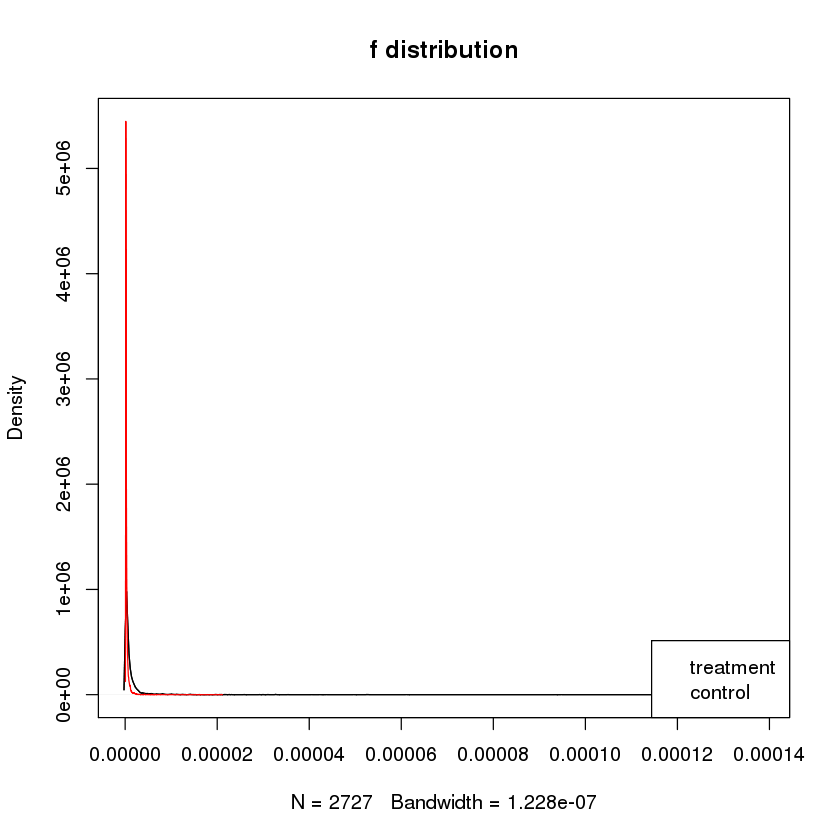

[1] "D_S"


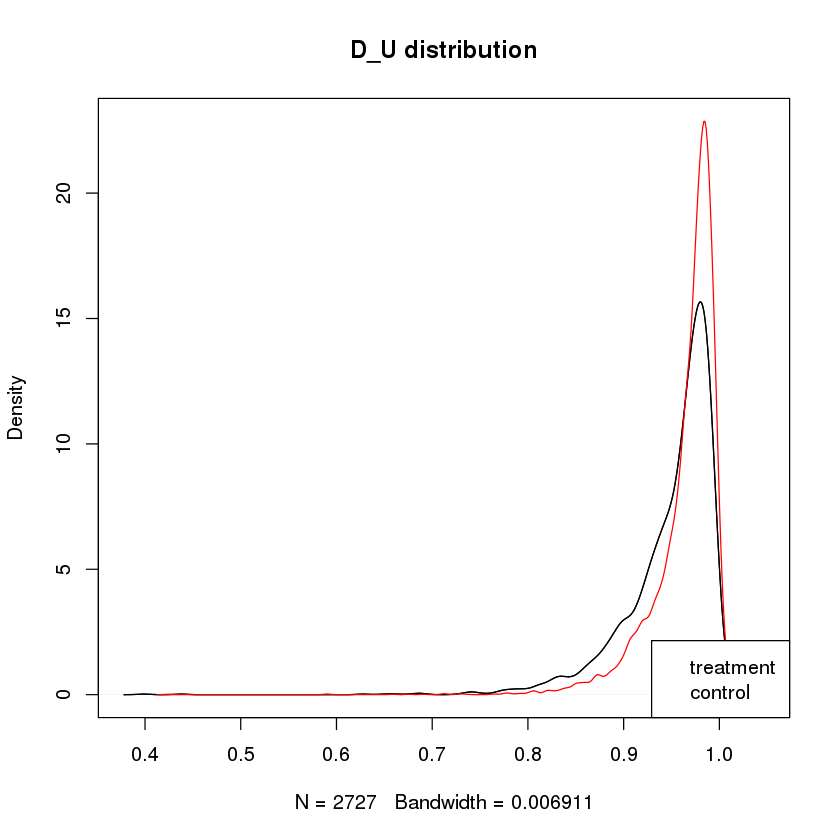

[1] "D_T"


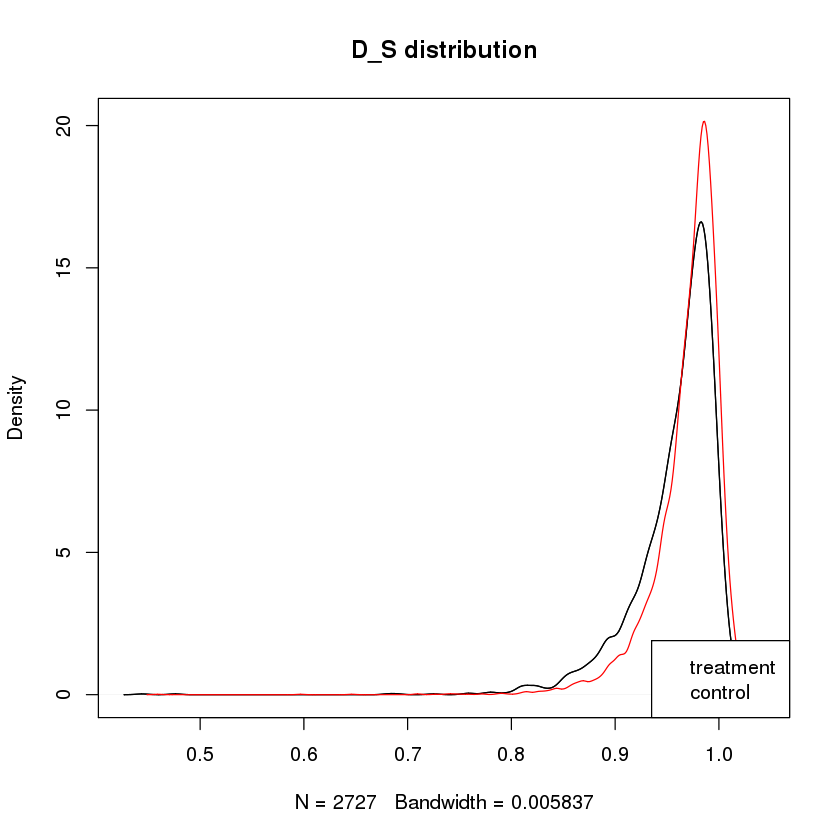

[1] "C2"


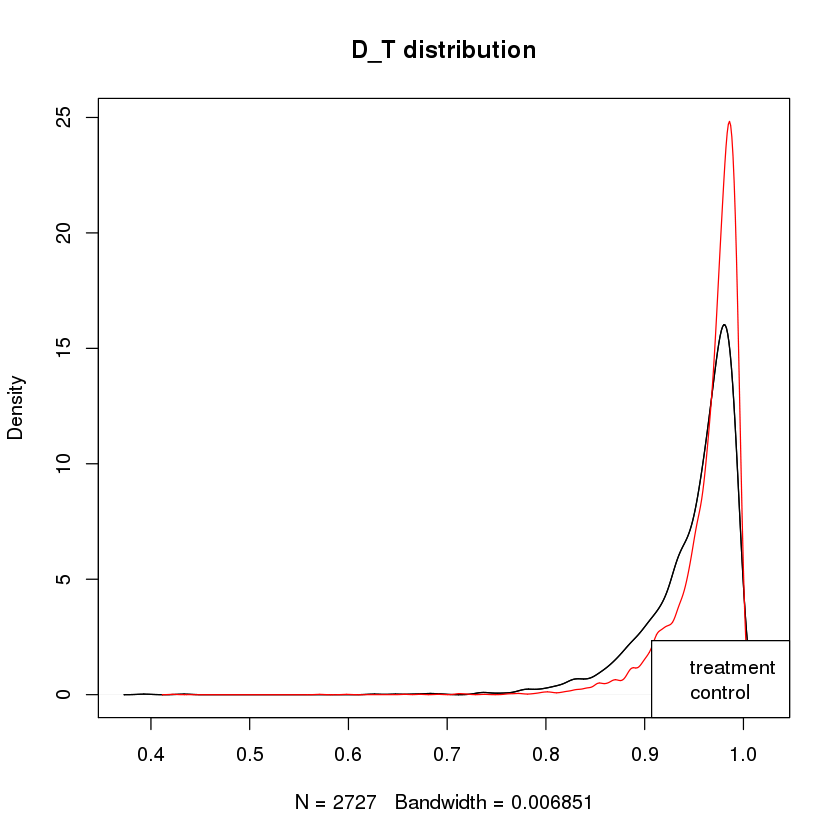

[1] "C3"


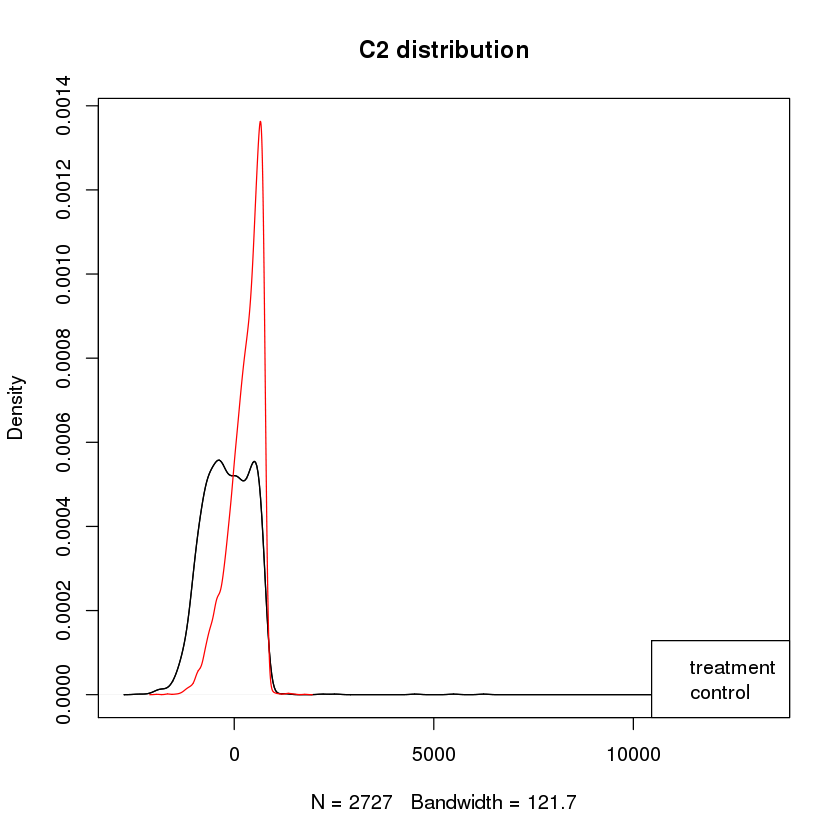

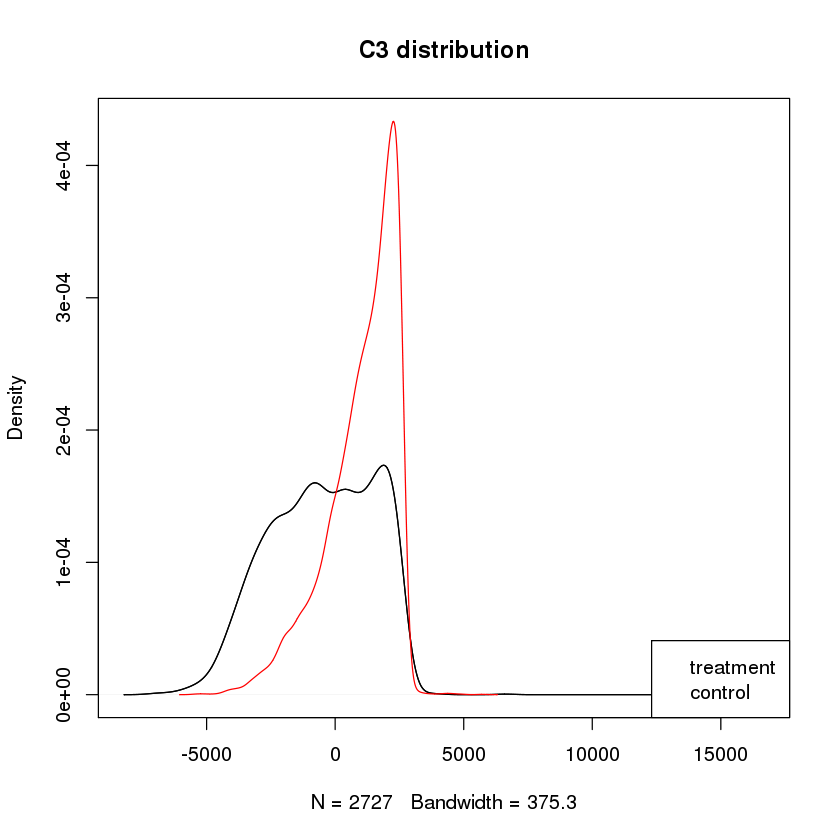

In [77]:
treatment <- "D25"
treatment_val <- 1
control_val <- 0
group_names <- c("treatment", "control")
treatment_color <- rgb(1,0,0,0.5)
control_color <- rgb(0,0,1,0.5)
cov <- c('f', 'D_U', 'D_S', 'D_T', 'C2', 'C3')
bins <- 50
for(v in cov){
    print(v)
    treatment_stats <- matching_stats[which(matching_stats[, treatment] == treatment_val), v]
    control_stats <- matching_stats[which(matching_stats[, treatment] == control_val), v]
    all_stats <- list(treatment_stats, control_stats)
    plot.multi.dens(all_stats, v, group_names)
#     treatment_stats <- data.frame(x=matching_stats[which(matching_stats[, treatment] == treatment_val), v], group='treatment')
#     control_stats <- data.frame(x=matching_stats[which(matching_stats[, treatment] == control_val), v], group='control')
#     dat <- rbind(treatment_stats, control_stats)
#     print(head(x))
#     hist(control_stats, breaks=bins, col=control_color, main = paste(treatment_name, v, sep=' '))
#     hist(treatment_stats, breaks=bins, col=treatment_color, add=T)
#     ggplot(dat, aes(x, fill=group, colour=group)) +
#     geom_histogram(aes(y=..density..), alpha=0.6, 
#                    position="identity", lwd=0.2) +
#     ggtitle(paste("Normalized", v, sep=' '));
}

Treatment is black, control is red.

Conclusion: C2 and C3 are most visually discriminating features for treatment vs. control.

## Matching test

In [5]:
library('MatchIt')
library('dplyr')
library('ggplot2')

In [346]:
m = matchit(D25 ~ f + D_U + D_S + D_T + C2 + C3, method="nearest", data = matching_stats, ratio = 1)

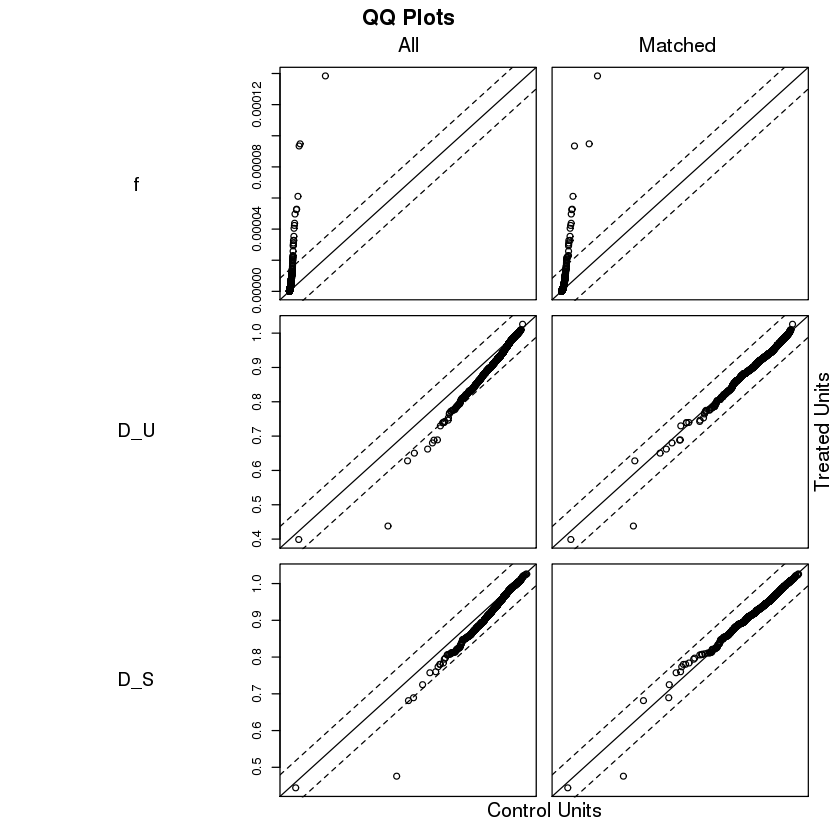

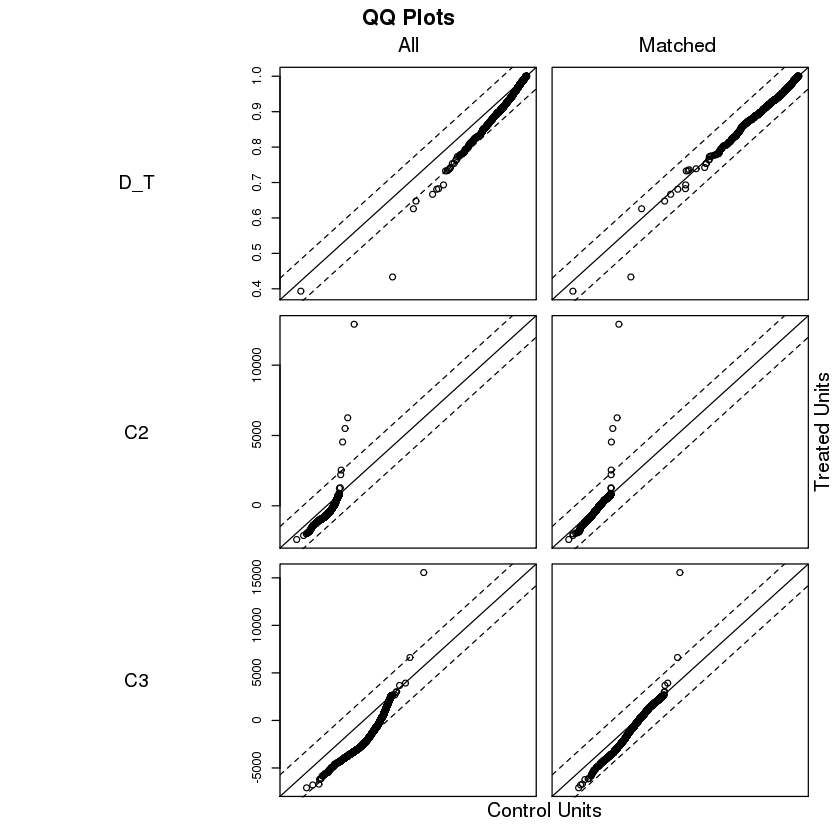

In [347]:
plot(m)

Matching helps slightly align the covariates.

In [348]:
matched = match.data(m)

In [324]:
print(typeof(matched))
print(length(matched$Y))
print(head(matched))

[1] "list"
[1] 5454
             Y D10 D25 D40 D60 D75 D90            f       D_U       D_S
mils         1   0   0   1   1   1   1 5.714619e-07 0.9067500 0.9219329
proletariat  1   0   1   1   1   1   1 2.575612e-06 0.8014563 0.8540350
merced       1   0   1   1   1   1   1 2.228802e-07 0.8980811 0.9007077
savescumming 1   0   0   1   1   1   1 1.228382e-07 0.9272092 0.9480974
doggo        1   1   1   1   1   1   1 5.073000e-07 0.9512418 0.9597497
lvling       1   0   0   0   1   1   1 8.542247e-07 0.9366344 0.9589156
                   D_T         C2         C3  distance weights
mils         0.9115351  -235.6634  -706.4252 0.5162643       1
proletariat  0.8060239 -1170.5236 -3937.7581 0.9704878       1
merced       0.8928669   311.8438  1222.4888 0.3242276       1
savescumming 0.9242712   800.6884  2680.2077 0.1161327       1
doggo        0.9438130   364.9087  1134.3480 0.1955249       1
lvling       0.9351895  -432.0370 -1446.9238 0.5345738       1


In [325]:
print(m$match.matrix)

                    1                         
proletariat         "flopped"                 
merced              "throughly"               
doggo               "alleyways"               
otp                 "twinks"                  
trappy              "incoherence"             
botting             "attained"                
tweet               "cloister"                
beasting            "drugstores"              
fanfics             "bails"                   
headcanon           "contemplated"            
fml                 "rediculous"              
quickdraw           "bassline"                
dicker              "unshaven"                
guilters            "unnaturally"             
fam                 "exceedingly"             
wutface             "lessee"                  
rn                  "nahhh"                   
oneshots            "pounced"                 
anotha              "summarily"               
litterally          "disengaged"              
observables  

This is weird: we have a lot of growth-growth pairs (`memed` vs. `fucky`) and stable-stable pairs (`huevo` vs. `predating`). This makes sense given the treatment variable $D$ but isn't what I initially wanted to do.

## Check covariate means

In [326]:
cov <- c('f', 'D_U', 'D_S', 'D_T', 'C2', 'C3')
matched %>%
    group_by(D25) %>%
    select(one_of(cov)) %>%
    summarise_all(funs(mean))

Adding missing grouping variables: `D25`


D25 f            D_U       D_S       D_T       C2         C3        
1 0   5.661338e-07 0.9533639 0.9609238 0.9528385  -45.87641  -21.25796
2 1   1.409596e-06 0.9491516 0.9587769 0.9487694 -156.60981 -495.28314

The main significant difference between treatment and control is with $C2$ and $C3$.

In [327]:
# do t-tests to confirm
for(v in cov){
    print(v);
    print(t.test(matched[, v] ~ matched$D25))
}

[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -8.5965, df = 2849, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.035848e-06 -6.510754e-07
sample estimates:
mean in group 0 mean in group 1 
   5.661338e-07    1.409596e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 3.3226, df = 5447.8, p-value = 0.0008977
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001726968 0.006697668
sample estimates:
mean in group 0 mean in group 1 
      0.9533639       0.9491516 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 1.9049, df = 5442.5, p-value = 0.05685
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.256095e-05  4.356357e-03
sample estimates:
mean in group 0 mean in group 1 
      0.9609238       0.9587769 

[1] "D_T"

	Welch Two

Not good! Most of the covariates, grouped by treatment status, have significantly different means. The means should not be significantly different if we want to estimate the effect of treatment.

## Compare region of common support
Compute propensity scores for treatment vs. control groups.

In [351]:
m_ps <- glm(D25 ~ f + D_U + D_S + D_T + C2 + C3, data=matched)
print(summary(m_ps))
prs_df <- data.frame(pr_score = predict(m_ps, type='response'), D25 = m_ps$model$D25)
head(prs_df)


Call:
glm(formula = D25 ~ f + D_U + D_S + D_T + C2 + C3, data = matched)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8727  -0.4853  -0.3468   0.4998   0.6664  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.102e+00  1.715e-01   6.427 1.41e-10 ***
f            1.300e+04  3.299e+03   3.941 8.21e-05 ***
D_U         -9.424e-01  1.362e+00  -0.692    0.489    
D_S          6.706e-01  6.407e-01   1.047    0.295    
D_T         -3.906e-01  1.456e+00  -0.268    0.788    
C2          -1.400e-05  5.877e-05  -0.238    0.812    
C3          -3.032e-05  1.863e-05  -1.628    0.104    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2425584)

    Null deviance: 1363.5  on 5453  degrees of freedom
Residual deviance: 1321.2  on 5447  degrees of freedom
AIC: 7761.1

Number of Fisher Scoring iterations: 2



pr_score  D25
mils         0.5419112 0  
proletariat  0.7739523 1  
merced       0.4724486 1  
savescumming 0.4121633 0  
doggo        0.4476731 1  
lvling       0.5581905 0

Now let's plot the propensity scores of treatment and control groups.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”

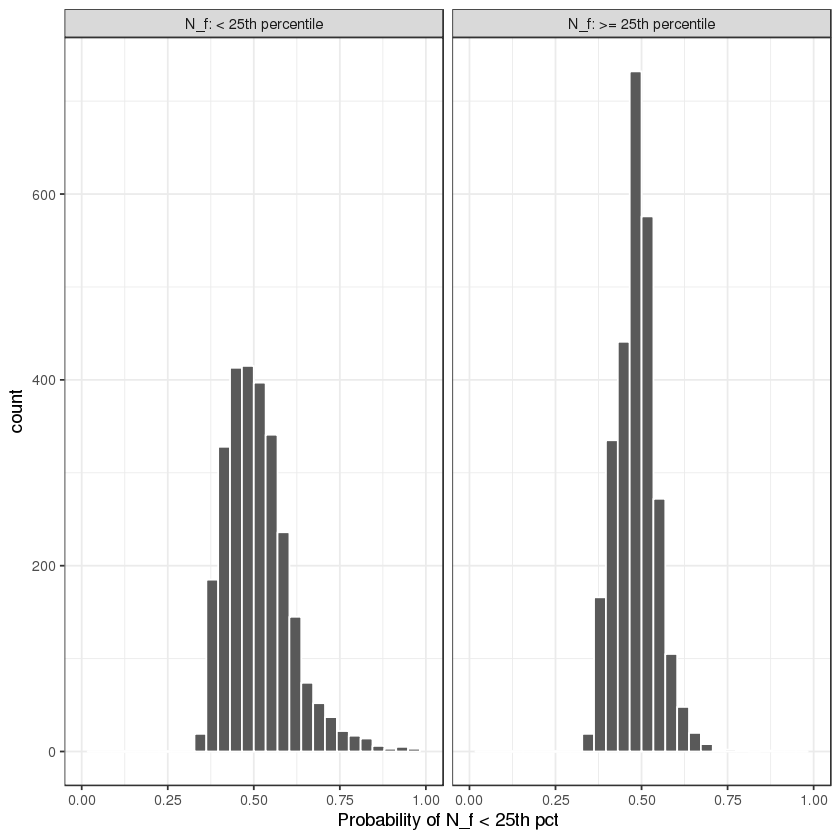

In [355]:
labs <- paste('N_f:', c('< 25th percentile', '>= 25th percentile'))
prs_df %>%
    mutate(D25 = ifelse(D25 == 1, labs[1], labs[2])) %>%
    ggplot(aes(x = pr_score)) +
    geom_histogram(color = 'white') + 
    facet_wrap(~D25) + 
    xlab("Probability of N_f < 25th pct") +
    xlim(c(0,1)) +
    theme_bw()

Propensity scores have slightly longer tail for treated group, so the model has a weak fit I guess?

## Check for significant difference between treatment/control effect on outcome

Do a t-test for treatment on outcome.

In [328]:
test_results <- t.test(Y ~ D25, data = matched)

In [329]:
print(test_results)


	Welch Two Sample t-test

data:  Y by D25
t = -7.0997, df = 5178.7, p-value = 1.419e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07861721 -0.04459511
sample estimates:
mean in group 0 mean in group 1 
     0.08654199      0.14814815 



So despite (or because of?) the difference in covariate means, there is a significant difference between growth vs. non-growth in terms of treatment. 

In [331]:
lm_treatment <- lm(Y ~ D25, data = matched)
summary(lm_treatment)


Call:
lm(formula = Y ~ D25, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14815 -0.14815 -0.08654 -0.08654  0.91346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.086542   0.006136   14.11  < 2e-16 ***
D25         0.061606   0.008677    7.10 1.41e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3204 on 5452 degrees of freedom
Multiple R-squared:  0.009161,	Adjusted R-squared:  0.008979 
F-statistic: 50.41 on 1 and 5452 DF,  p-value: 1.41e-12


Now include covariates to debug.

In [336]:
lm_cov <- lm(Y ~ D25 + f + D_U + D_S + D_T + + C2 + C3, data = matched)
summary(lm_cov)
lm_cov <- lm(Y ~ D25 + f + D_U + D_S + D_T + D_S*D_U + C2 + C3 + C2*C3, data = matched)
summary(lm_cov)


Call:
lm(formula = Y ~ D25 + f + D_U + D_S + D_T + +C2 + C3, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16524 -0.13834 -0.07121 -0.01574  1.09100 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.754e+00  1.037e-01  16.913  < 2e-16 ***
D25          2.842e-02  8.164e-03   3.481 0.000503 ***
f            1.211e+04  1.991e+03   6.083 1.26e-09 ***
D_U          3.209e-01  8.209e-01   0.391 0.695913    
D_S          2.300e+00  3.860e-01   5.957 2.74e-09 ***
D_T         -4.394e+00  8.771e-01  -5.010 5.61e-07 ***
C2           8.249e-05  3.541e-05   2.330 0.019867 *  
C3          -4.328e-05  1.123e-05  -3.855 0.000117 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2967 on 5446 degrees of freedom
Multiple R-squared:  0.1511,	Adjusted R-squared:   0.15 
F-statistic: 138.5 on 7 and 5446 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ D25 + f + D_U + D_S + D_T + D_S * D_U + C2 + 
    C3 + C2 * C3, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87491 -0.13987 -0.06955 -0.01116  1.09920 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.706e-01  5.301e-01  -0.322 0.747617    
D25          2.740e-02  8.169e-03   3.354 0.000802 ***
f            1.285e+04  2.074e+03   6.192 6.36e-10 ***
D_U          2.688e+00  1.038e+00   2.591 0.009591 ** 
D_S          4.391e+00  6.878e-01   6.384 1.87e-10 ***
D_T         -4.513e+00  8.767e-01  -5.148 2.73e-07 ***
C2           8.619e-05  3.581e-05   2.407 0.016130 *  
C3          -4.525e-05  1.134e-05  -3.990 6.70e-05 ***
D_U:D_S     -2.427e+00  6.545e-01  -3.708 0.000211 ***
C2:C3       -1.772e-09  1.699e-09  -1.043 0.296972    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2964 on 5444 degrees of freedom
Multiple R-squared:  0.1534,	Adjusted R-squar

Significant but weak effect from $D25$. So words with nearest neighbors lower than the 25th percentile are slightly more likely to be growth words, which follows from the distribution we saw [earlier](test_propensity_score_matching.ipynb). 

## Change distance
Try Mahalanobis instead.

In [ ]:
m = matchit(D25 ~ f + D_U + D_S + D_T + C2 + C3, method="nearest", distance='mahalanobis', data = matching_stats)

ERROR: Error in solve.default(cov, ...): system is computationally singular: reciprocal condition number = 5.83616e-19


Try logit.

In [12]:
m = matchit(D25 ~ f + D_U + D_S + D_T + C2 + C3, method="nearest", distance='logit', data = matching_stats)
matched = match.data(m)
cov <- c('f', 'D_U', 'D_S', 'D_T', 'C2', 'C3')
for(v in cov){
    print(v);
    print(t.test(matched[, v] ~ matched$D25))
}
test_results <- t.test(Y ~ D25, data = matched)
print(test_results)

[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -8.5965, df = 2849, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.035848e-06 -6.510754e-07
sample estimates:
mean in group 0 mean in group 1 
   5.661338e-07    1.409596e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 3.3226, df = 5447.8, p-value = 0.0008977
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001726968 0.006697668
sample estimates:
mean in group 0 mean in group 1 
      0.9533639       0.9491516 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 1.9049, df = 5442.5, p-value = 0.05685
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.256095e-05  4.356357e-03
sample estimates:
mean in group 0 mean in group 1 
      0.9609238       0.9587769 

[1] "D_T"

	Welch Two

Again: inconclusive treatment vs. control effect because of high difference in covariates.

## Change split point
Test using different treatment split points (precomputed):

- below 10th percentile ($D10$)
- below 40th percentile ($D40$)
- below 60th percentile ($D60$)
- below 75th percentile ($D75$)
- below 90th percentile ($D90$)

In [302]:
print(head(matching_stats))

              Y D10 D25 D40 D60 D75 D90            f       D_U       D_S
mils          1   0   0   1   1   1   1 5.714619e-07 0.9067500 0.9219329
proletariat   1   0   1   1   1   1   1 2.575612e-06 0.8014563 0.8540350
merced        1   0   1   1   1   1   1 2.228802e-07 0.8980811 0.9007077
savescumming  1   0   0   1   1   1   1 1.228382e-07 0.9272092 0.9480974
collectivists 1   0   0   0   0   0   1 1.912455e-07 0.9067788 0.9144131
doggo         1   1   1   1   1   1   1 5.073000e-07 0.9512418 0.9597497
                    D_T         C2         C3
mils          0.9115351  -235.6634  -706.4252
proletariat   0.8060239 -1170.5236 -3937.7581
merced        0.8928669   311.8438  1222.4888
savescumming  0.9242712   800.6884  2680.2077
collectivists 0.9104395   508.4207  1787.6880
doggo         0.9438130   364.9087  1134.3480


D10 = $log(N_f)$ < 10th percentile

In [306]:
# D10
treatment <- 'D10'
relevant_stats <- matching_stats[c(treatment, cov, 'Y')]
m = matchit(D10 ~ f + D_U + D_S + D_T + C2 + C3, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D10);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D10, data = matched)
print(test_results)

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D10
t = -5.9436, df = 1167.2, p-value = 3.677e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.893872e-06 -9.538393e-07
sample estimates:
mean in group 0 mean in group 1 
   1.179787e-06    2.603642e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D10
t = 3.0907, df = 2164.9, p-value = 0.002022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.002542737 0.011371325
sample estimates:
mean in group 0 mean in group 1 
      0.9531631       0.9462061 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D10
t = 2.0448, df = 2115.7, p-value = 0.041
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0001607655 0.0076945737
sample estimates:
mean in group 0 mean in group 1 
      0.9627365       0.9588089 



D40 = $log(N_f)$ < 40th percentile

In [308]:
treatment <- 'D40'
relevant_stats <- matching_stats[c(treatment, cov, 'Y')]
m = matchit(D40 ~ f + D_U + D_S + D_T + C2 + C3, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D40);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D40, data = matched)
print(test_results)

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D40
t = -11.25, df = 4464.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.162613e-07 -5.739836e-07
sample estimates:
mean in group 0 mean in group 1 
   3.585600e-07    1.053682e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D40
t = 8.1274, df = 8476.7, p-value = 5.004e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.005446317 0.008908558
sample estimates:
mean in group 0 mean in group 1 
      0.9597521       0.9525746 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D40
t = 5.9047, df = 8621.4, p-value = 3.667e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.003134281 0.006249511
sample estimates:
mean in group 0 mean in group 1 
      0.9657950       0.9611031 



In [309]:
treatment <- 'D60'
relevant_stats <- matching_stats[c(treatment, cov, 'Y')]
m = matchit(D60 ~ f + D_U + D_S + D_T + C2 + C3, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D60);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D60, data = matched)
print(test_results)

Warning message in matchit2nearest(structure(c(1L, 1L, 1L, 1L, 0L, 1L, 1L, 1L, 0L, :
“Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest”

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D60
t = -14.171, df = 4407.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.929921e-07 -7.516235e-07
sample estimates:
mean in group 0 mean in group 1 
   2.629198e-07    1.135228e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D60
t = 24.1, df = 7473.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01908816 0.02246831
sample estimates:
mean in group 0 mean in group 1 
      0.9683205       0.9475423 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D60
t = 20.225, df = 7802.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01425377 0.01731336
sample estimates:
mean in group 0 mean in group 1 
      0.9730640       0.9572804 

[1] "D_T"

In [310]:
treatment <- 'D75'
relevant_stats <- matching_stats[c(treatment, cov, 'Y')]
m = matchit(D75 ~ f + D_U + D_S + D_T + C2 + C3, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D75);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D75, data = matched)
print(test_results)

Warning message in matchit2nearest(structure(c(1L, 1L, 1L, 1L, 0L, 1L, 1L, 1L, 0L, :
“Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest”

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D75
t = -14.626, df = 2740.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.610205e-06 -1.229506e-06
sample estimates:
mean in group 0 mean in group 1 
   2.400080e-07    1.659864e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D75
t = 25.164, df = 4155.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02793708 0.03265815
sample estimates:
mean in group 0 mean in group 1 
      0.9705403       0.9402427 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D75
t = 20.686, df = 4389.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02029169 0.02454062
sample estimates:
mean in group 0 mean in group 1 
      0.9748067       0.9523906 

[1] "D_

In [311]:
treatment <- 'D90'
relevant_stats <- matching_stats[c(treatment, cov, 'Y')]
m = matchit(D90 ~ f + D_U + D_S + D_T + C2 + C3, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D90);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D90, data = matched)
print(test_results)

Warning message in matchit2nearest(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, :
“Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest”

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D90
t = -11.7, df = 1092.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.211706e-06 -2.289168e-06
sample estimates:
mean in group 0 mean in group 1 
   2.314542e-07    2.981891e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D90
t = 24.905, df = 1378.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05267448 0.06168208
sample estimates:
mean in group 0 mean in group 1 
      0.9740210       0.9168428 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D90
t = 21.367, df = 1439.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03978737 0.04783127
sample estimates:
mean in group 0 mean in group 1 
      0.9781594       0.9343501 

[1] "D_T"

Attempting to test all the split points in a loop...didn't work.

In [299]:
treatment_vars <- c('D10', 'D40', 'D60', 'D75', 'D90')
for(treatment in treatment_vars){
    relevant_stats = matching_stats[c(treatment, cov)]
    formula <- paste(treatment, "~", paste(cov, collapse=' + '))
    print(formula)
    m = matchit(formula, method="nearest", data=relevant_stats, ratio=1)
#     m = matchit(substitute(treatment) ~ f + D_U + D_S + D_T + C2 + C3, method="nearest", data = relevant_stats, ratio = 1)
    matched = match.data(m)
    print(head(matched))
}

[1] "D10 ~ f + D_U + D_S + D_T + C2 + C3"


ERROR: Error: $ operator is invalid for atomic vectors


Conclusion: higher treatment split points lead to less convincing differences between groups. Words with higher neighbor frequency tend to have significantly different covariate values which could have an interaction with the treatment values.

## Modify covariates

Same test but with different sets of covariates.

In [313]:
cov1 <- c('f')
cov2 <- c('f', 'D_U', 'D_S', 'D_T')
cov3 <- c('f', 'C2', 'C3')

In [337]:
treatment <- 'D25'
relevant_stats <- matching_stats[c(treatment, cov1, 'Y')]
m = matchit(D25 ~ f, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov1) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D25);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D25, data = matched)
print(test_results)
lm_treatment1 <- lm(Y ~ D25, data = matched)
summary(lm_treatment1)
lm_cov1 <- lm(Y ~ D25 + f, data = matched)
summary(lm_cov1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -8.4919, df = 2848.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.025523e-06 -6.407719e-07
sample estimates:
mean in group 0 mean in group 1 
   5.764485e-07    1.409596e-06 

[1] "dependent test"

	Welch Two Sample t-test

data:  Y by D25
t = -8.4123, df = 5051.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08817143 -0.05484288
sample estimates:
mean in group 0 mean in group 1 
      0.0766410       0.1481481 




Call:
lm(formula = Y ~ D25, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14815 -0.14815 -0.07664 -0.07664  0.92336 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.076641   0.006011  12.751   <2e-16 ***
D25         0.071507   0.008500   8.412   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3139 on 5452 degrees of freedom
Multiple R-squared:  0.01281,	Adjusted R-squared:  0.01263 
F-statistic: 70.77 on 1 and 5452 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ D25 + f, data = matched)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7181 -0.1281 -0.0820 -0.0708  0.9320 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.583e-02  5.906e-03  11.147  < 2e-16 ***
D25         5.588e-02  8.354e-03   6.689 2.47e-11 ***
f           1.875e+04  1.146e+03  16.369  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3065 on 5451 degrees of freedom
Multiple R-squared:  0.05907,	Adjusted R-squared:  0.05872 
F-statistic: 171.1 on 2 and 5451 DF,  p-value: < 2.2e-16


Weak positive significant $D25$ correlation.

In [338]:
treatment <- 'D25'
relevant_stats <- matching_stats[c(treatment, cov2, 'Y')]
m = matchit(D25 ~ f + D_U + D_S + D_T, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov2) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D25);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D25, data = matched)
print(test_results)
lm_treatment1 <- lm(Y ~ D25, data = matched)
summary(lm_treatment1)
lm_cov2 <- lm(Y ~ D25 + D_U + D_S + D_T, data = matched)
summary(lm_cov2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -9.0293, df = 2853.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.078707e-06 -6.937921e-07
sample estimates:
mean in group 0 mean in group 1 
   5.233464e-07    1.409596e-06 

[1] "D_U"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -4.1349, df = 5451.6, p-value = 3.604e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007801064 -0.002783031
sample estimates:
mean in group 0 mean in group 1 
      0.9438595       0.9491516 

[1] "D_S"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -5.1826, df = 5430.6, p-value = 2.267e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.008140638 -0.003672260
sample estimates:
mean in group 0 mean in group 1 
      0.9528705       0.958


Call:
lm(formula = Y ~ D25, data = matched)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1482 -0.1482 -0.1203 -0.1203  0.8797 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.120279   0.006523  18.438  < 2e-16 ***
D25         0.027869   0.009226   3.021  0.00253 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3407 on 5452 degrees of freedom
Multiple R-squared:  0.001671,	Adjusted R-squared:  0.001488 
F-statistic: 9.126 on 1 and 5452 DF,  p-value: 0.002532



Call:
lm(formula = Y ~ D25 + D_U + D_S + D_T, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14398 -0.15348 -0.09105 -0.03731  1.09417 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.545489   0.105373  14.667  < 2e-16 ***
D25          0.034428   0.008831   3.899 9.79e-05 ***
D_U          0.392797   0.842596   0.466    0.641    
D_S          3.326445   0.401351   8.288  < 2e-16 ***
D_T         -5.263567   0.911342  -5.776 8.09e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.325 on 5449 degrees of freedom
Multiple R-squared:  0.09194,	Adjusted R-squared:  0.09127 
F-statistic: 137.9 on 4 and 5449 DF,  p-value: < 2.2e-16


Stronger positive significant effect for $D25$.

In [339]:
treatment <- 'D25'
relevant_stats <- matching_stats[c(treatment, cov3, 'Y')]
m = matchit(D25 ~ f + C2 + C3, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov3) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D25);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D25, data = matched)
print(test_results)
lm_treatment1 <- lm(Y ~ D25, data = matched)
summary(lm_treatment1)
lm_cov3 <- lm(Y ~ D25 + C2 + C3, data = matched)
summary(lm_cov3)

[1] "covariate tests"
[1] "f"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -8.5045, df = 2848.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.026756e-06 -6.420065e-07
sample estimates:
mean in group 0 mean in group 1 
   5.752144e-07    1.409596e-06 

[1] "C2"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 5.9362, df = 4885.5, p-value = 3.118e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  61.18075 121.51702
sample estimates:
mean in group 0 mean in group 1 
      -65.26093      -156.60981 

[1] "C3"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 8.4428, df = 5084.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 316.2278 507.4986
sample estimates:
mean in group 0 mean in group 1 
      -83.41995      -495.28314 

[1] "dependen


Call:
lm(formula = Y ~ D25, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14815 -0.14815 -0.07187 -0.07187  0.92813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.071874   0.005948  12.083   <2e-16 ***
D25         0.076274   0.008412   9.067   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3106 on 5452 degrees of freedom
Multiple R-squared:  0.01486,	Adjusted R-squared:  0.01467 
F-statistic: 82.21 on 1 and 5452 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ D25 + C2 + C3, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08286 -0.12740 -0.09277 -0.05496  1.03352 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.123e-02  5.901e-03  13.766  < 2e-16 ***
D25          6.172e-02  8.333e-03   7.407 1.49e-13 ***
C2           2.632e-04  2.069e-05  12.719  < 2e-16 ***
C3          -9.370e-05  6.527e-06 -14.355  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3049 on 5450 degrees of freedom
Multiple R-squared:  0.05146,	Adjusted R-squared:  0.05094 
F-statistic: 98.55 on 3 and 5450 DF,  p-value: < 2.2e-16


Better linear model fit with covariates $C2,C3$.

## Rescale variables
Rescale variables to (0,1) range and then log to see what the distributions look like.

First just display the raw distributions.

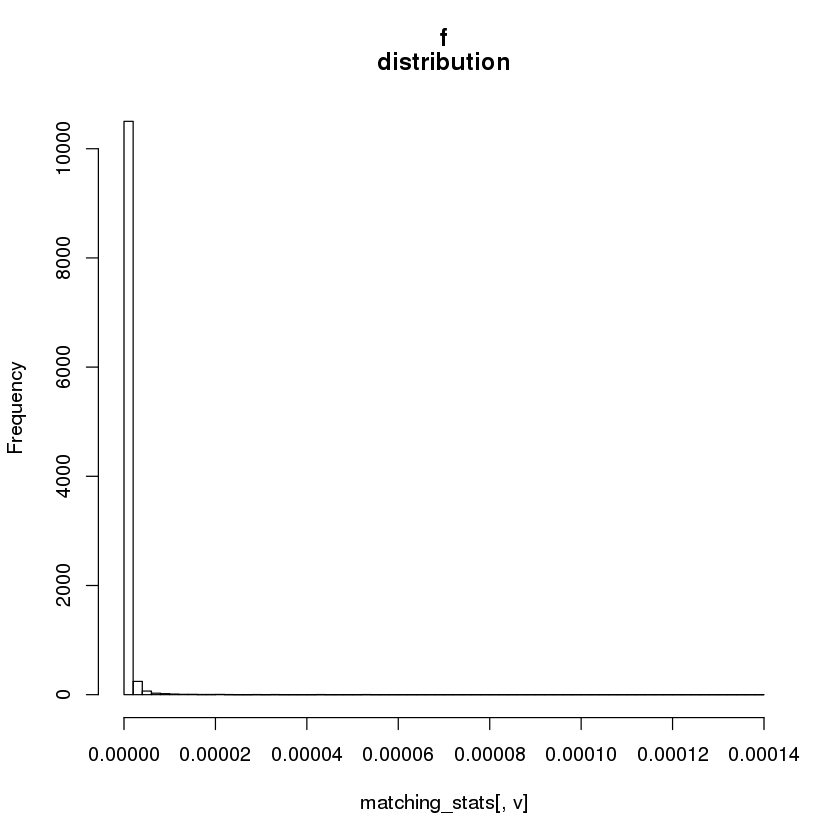

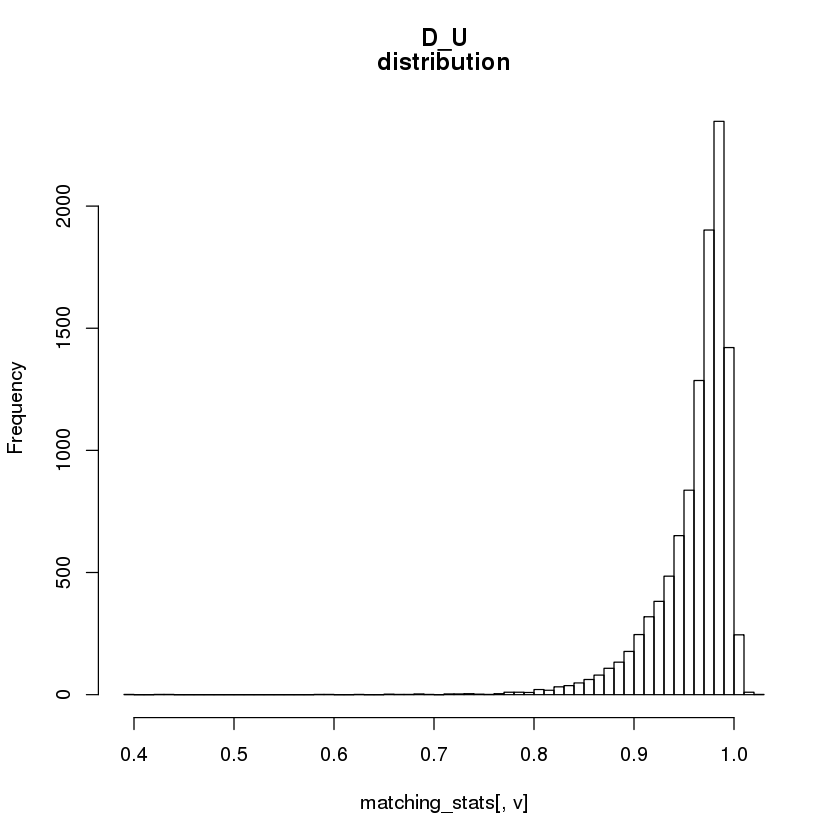

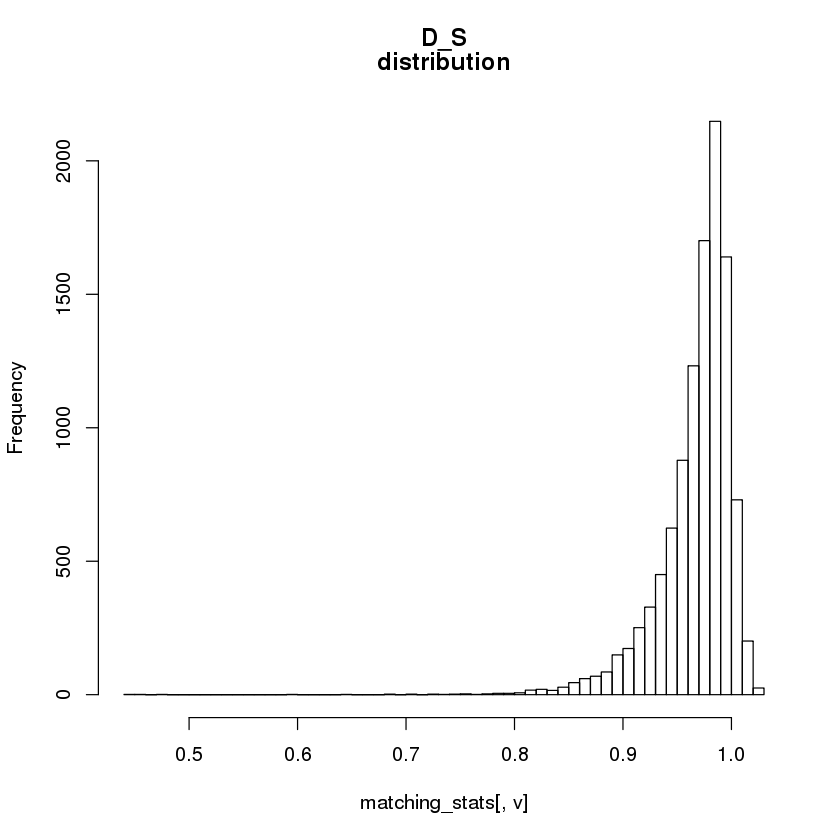

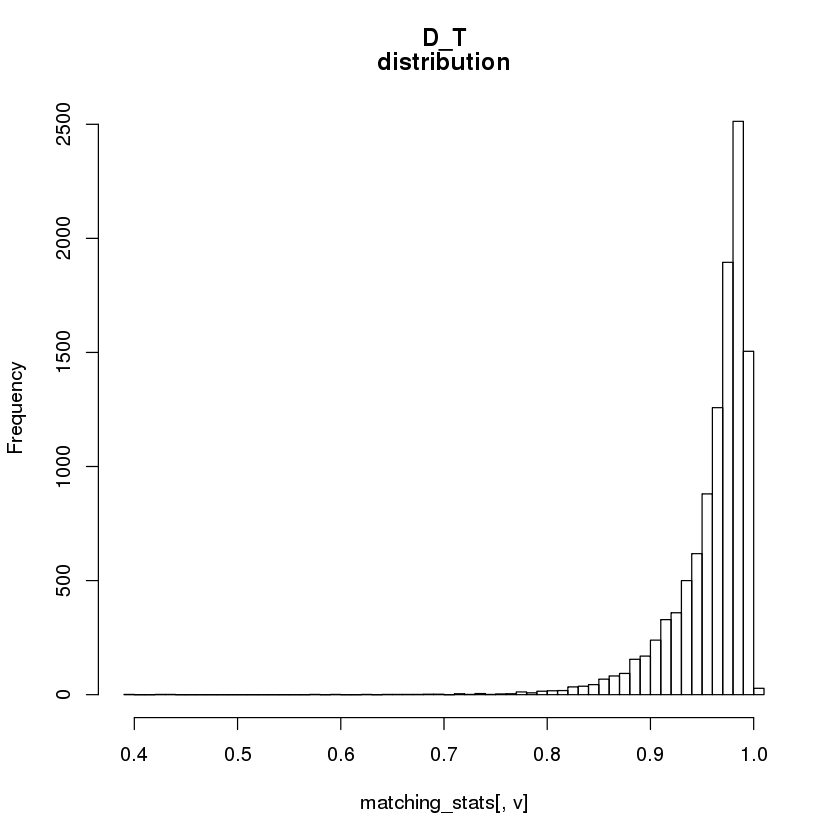

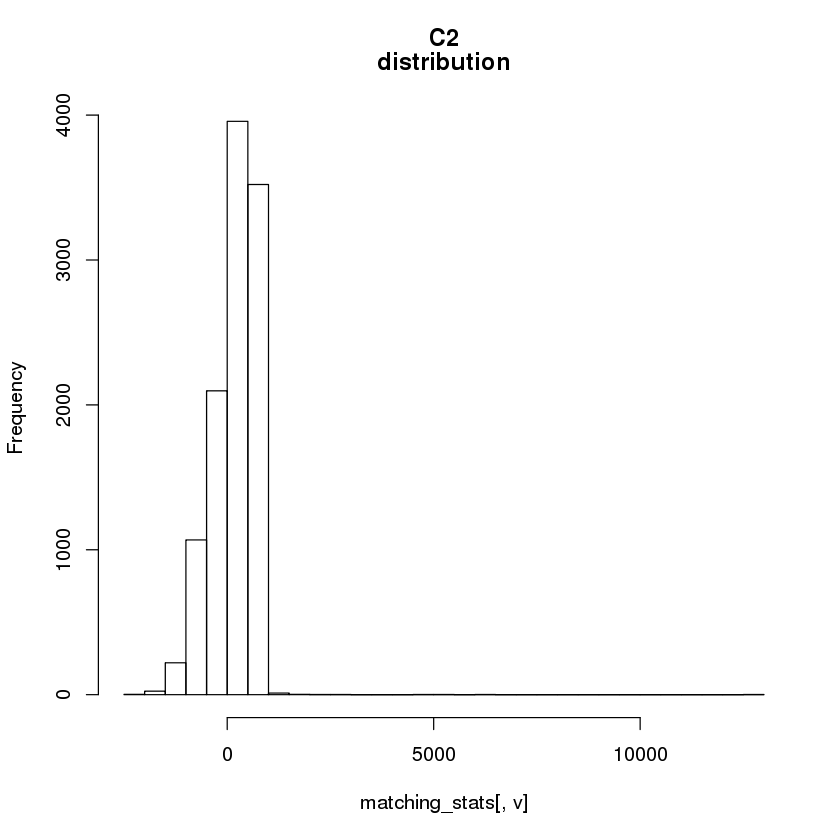

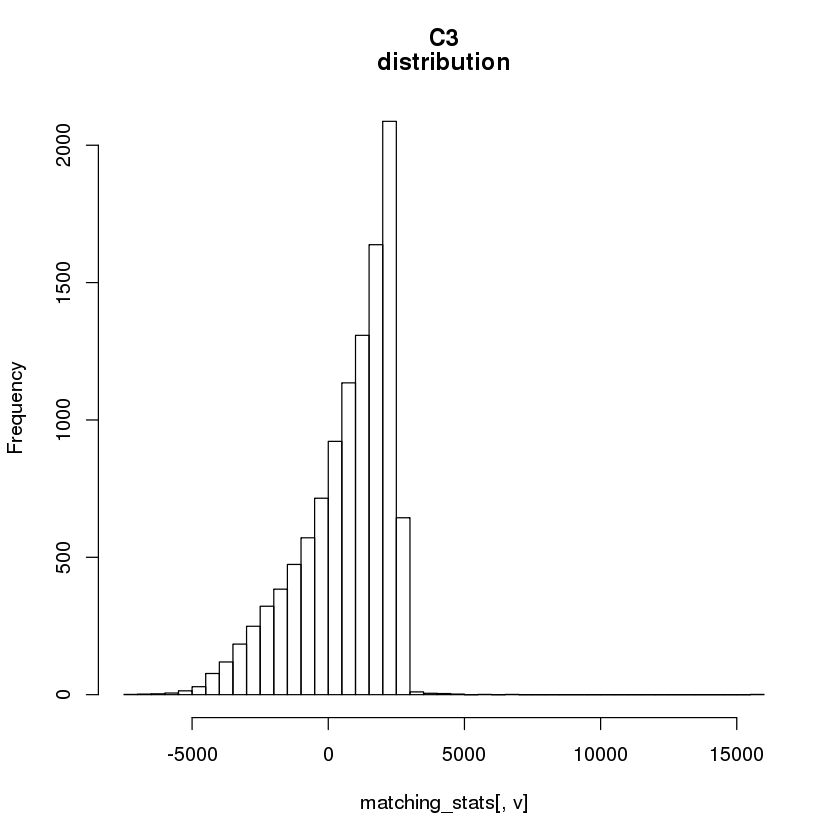

In [24]:
cov <- c('f', 'D_U', 'D_S', 'D_T', 'C2', 'C3')
bins = 50
for(v in cov) {
    hist(matching_stats[,v], breaks=bins, main = paste(c(v, 'distribution'), sep = ' '))
#     ggplot(aes(x = matching_stats[,v])) +
#     geom_histogram(color = 'white') + 
# #     facet_wrap(~D25) + 
# #     xlab("Probability of N_f < 25th pct") +
# #     xlim(c(0,1)) +
#     theme_bw()
}

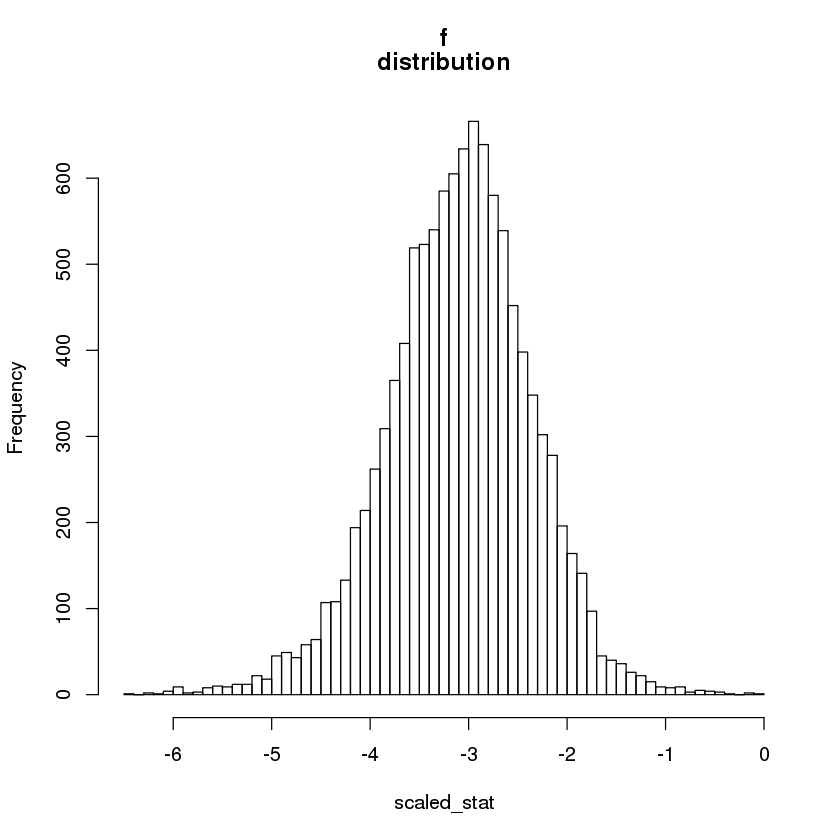

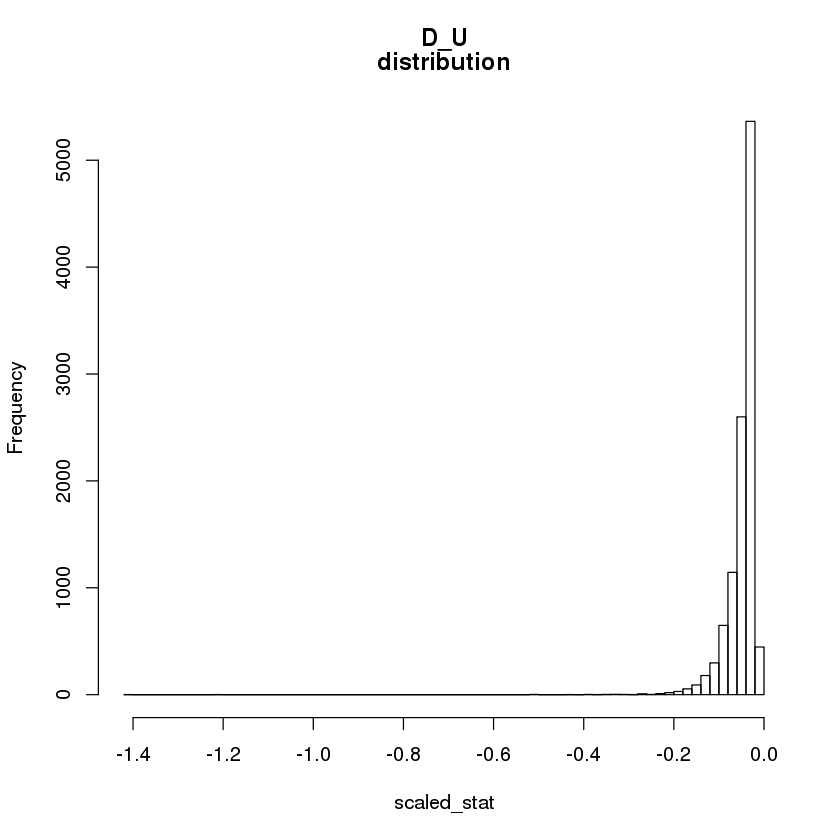

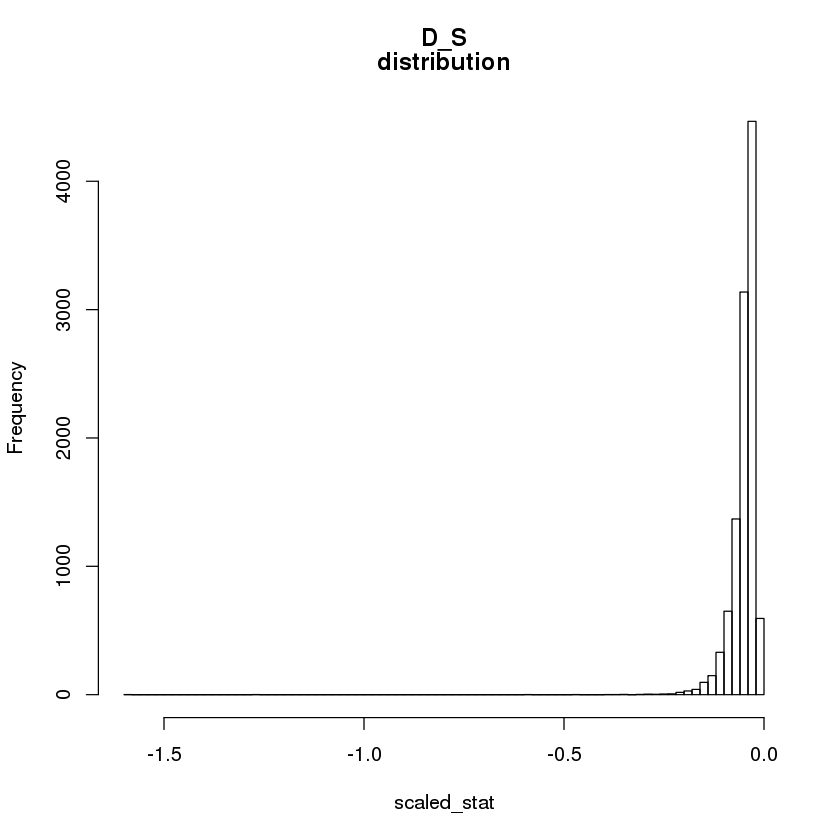

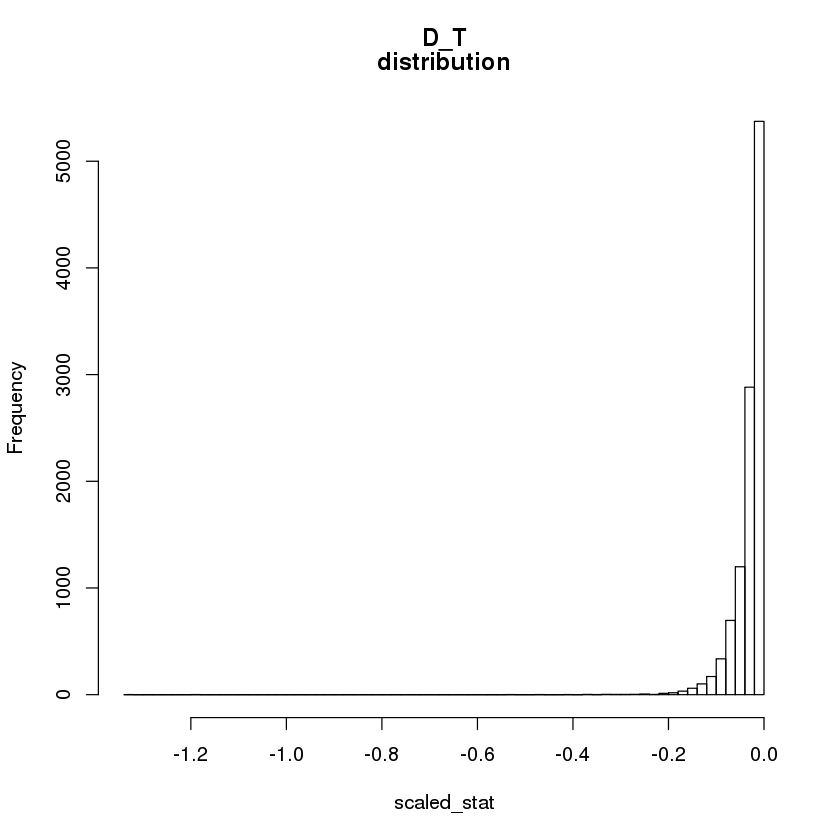

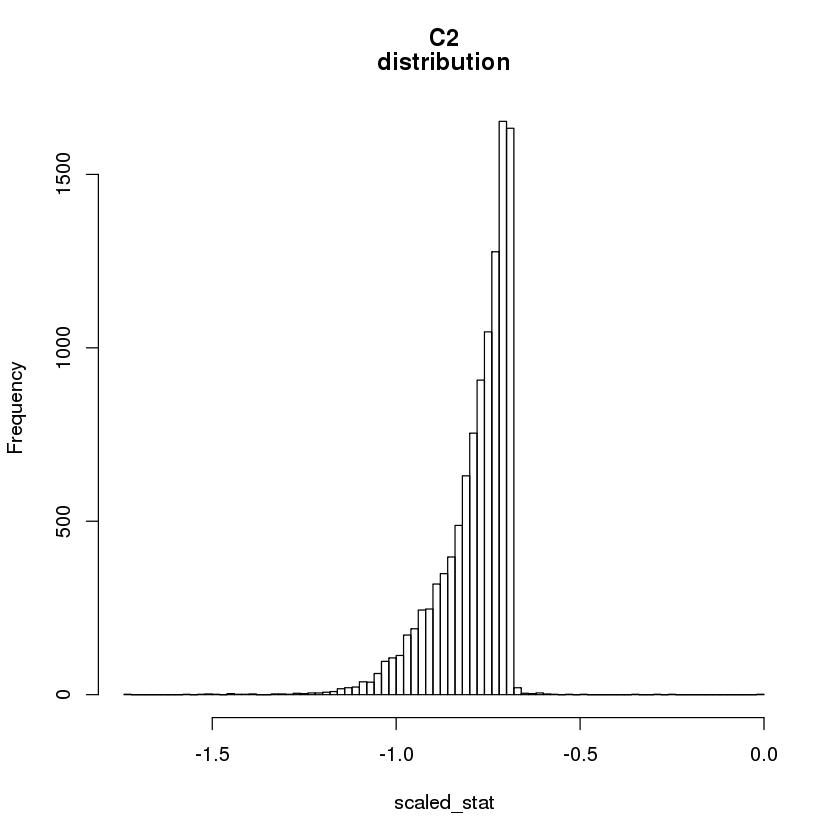

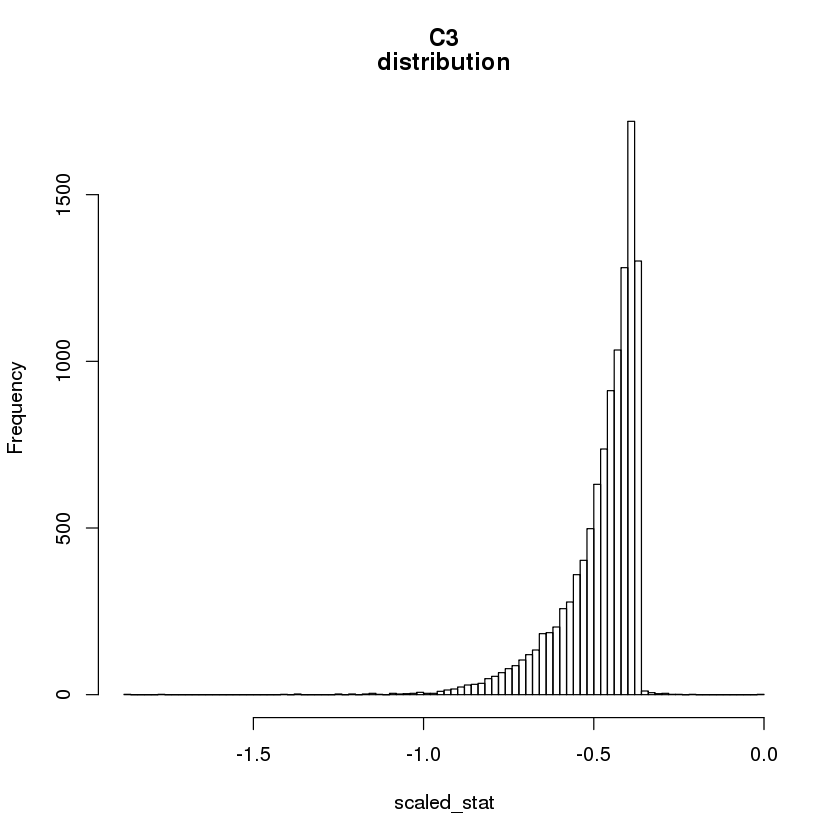

In [37]:
bins = 75
for(v in cov) {
    stat_v <- matching_stats[,v];
    stat_v_min <- min(stat_v);
    stat_v_range <- max(stat_v) - stat_v_min;
    scaled_stat <- log10((stat_v - stat_v_min) / stat_v_range)
    hist(scaled_stat, breaks=bins, main = paste(c(v, 'distribution'), sep = ' '))
}

Arguably the only variable affected was $f$.

In [53]:
scaled_f <- matching_stats[, "f"]
# smooth first
smoothr <- min(scaled_f[which(scaled_f > 0)])
scaled_f <- log10((scaled_f - min(scaled_f)) / diff(range(scaled_f)) + smoothr)
matching_stats$f_log <- scaled_f

Generate all log scaled values anyway.

In [85]:
cov <- c('f', 'D_U', 'D_S', 'D_T', 'C2', 'C3')
for(v in cov) {
    scaled_v_name <- paste(v, "_log", sep='')
    print(scaled_v_name)
    scaled_v <- matching_stats[, v]
    smoothr <- min(scaled_v[which(scaled_v > 0)])
    scaled_v <- log10((scaled_v - min(scaled_v)) / diff(range(scaled_v)) + smoothr)
    matching_stats[, scaled_v_name] <- scaled_v
}

[1] "f_log"
[1] "D_U_log"
[1] "D_S_log"
[1] "D_T_log"
[1] "C2_log"
[1] "C3_log"


Visualize treatment vs. control covariate distributions.

[1] "f_log"
[1] "D_U_log"


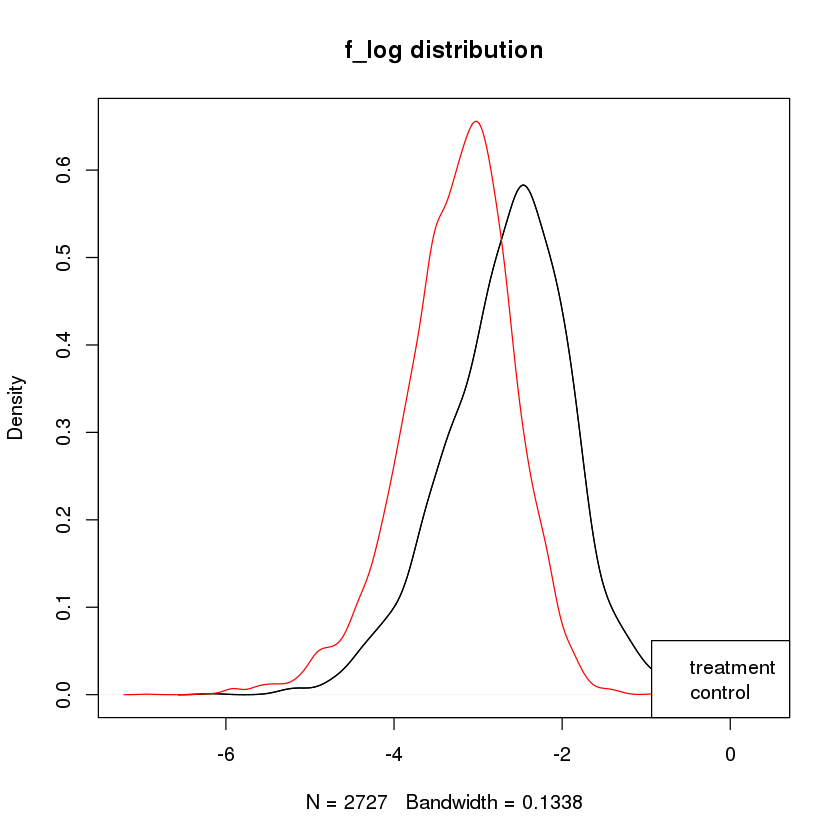

[1] "D_S_log"


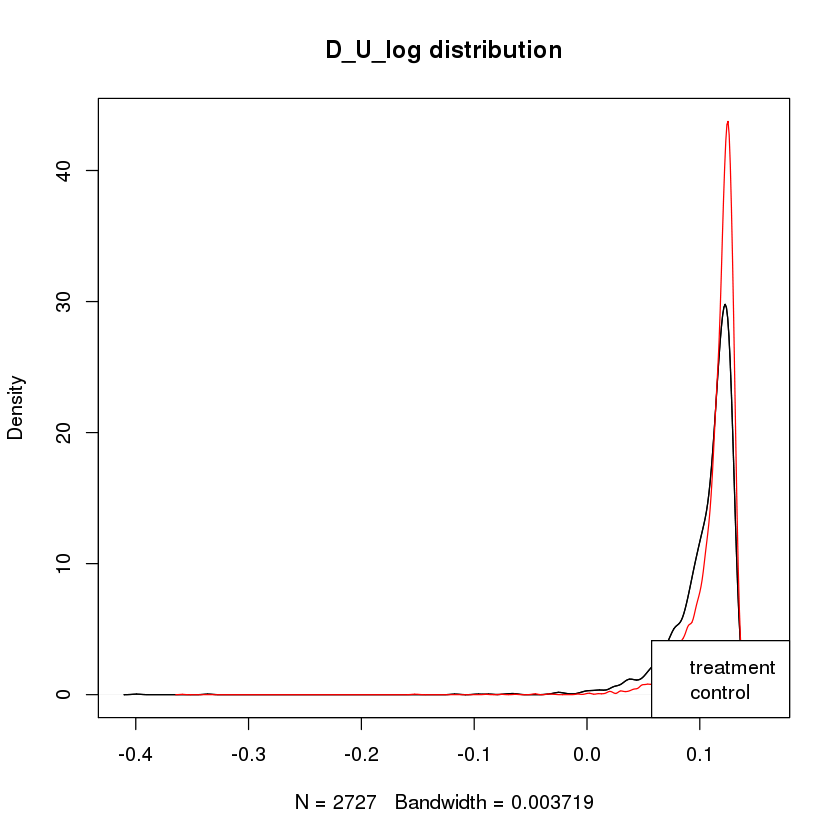

[1] "D_T_log"


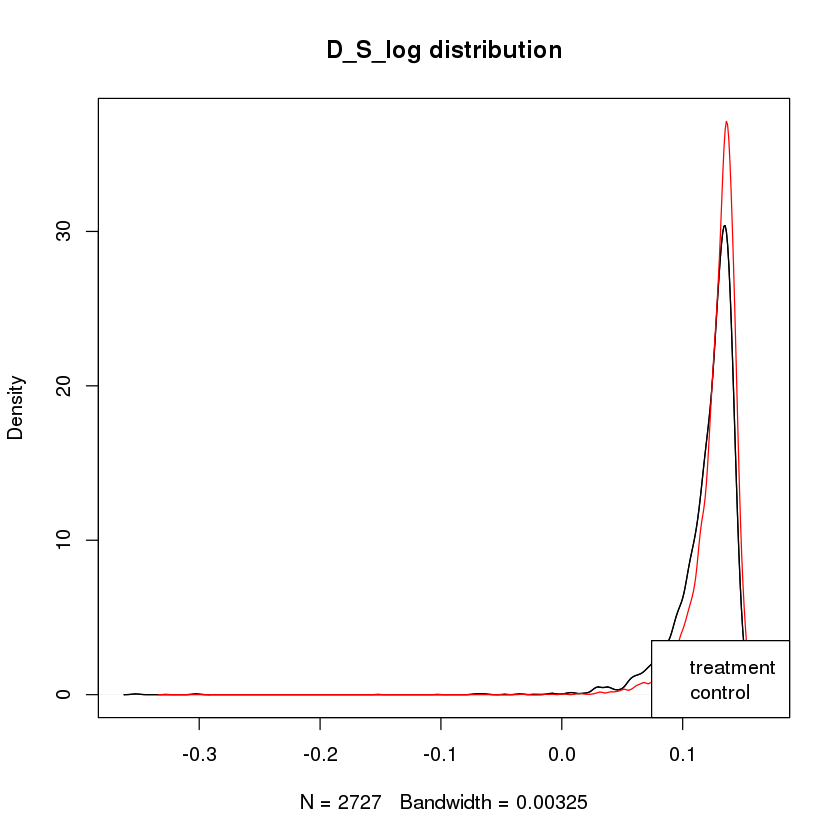

[1] "C2_log"


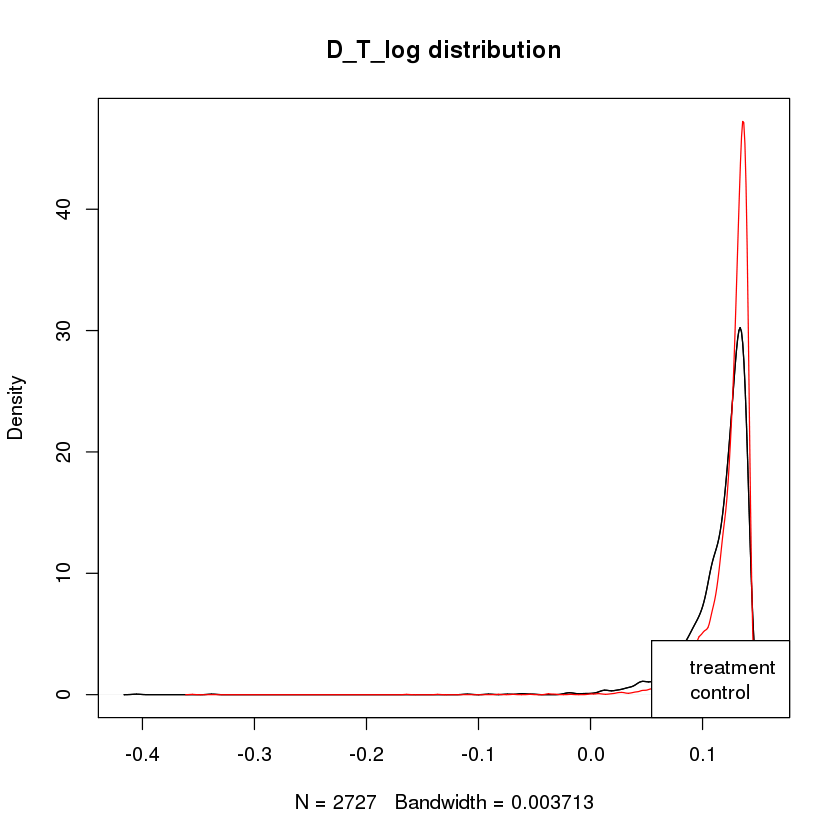

[1] "C3_log"


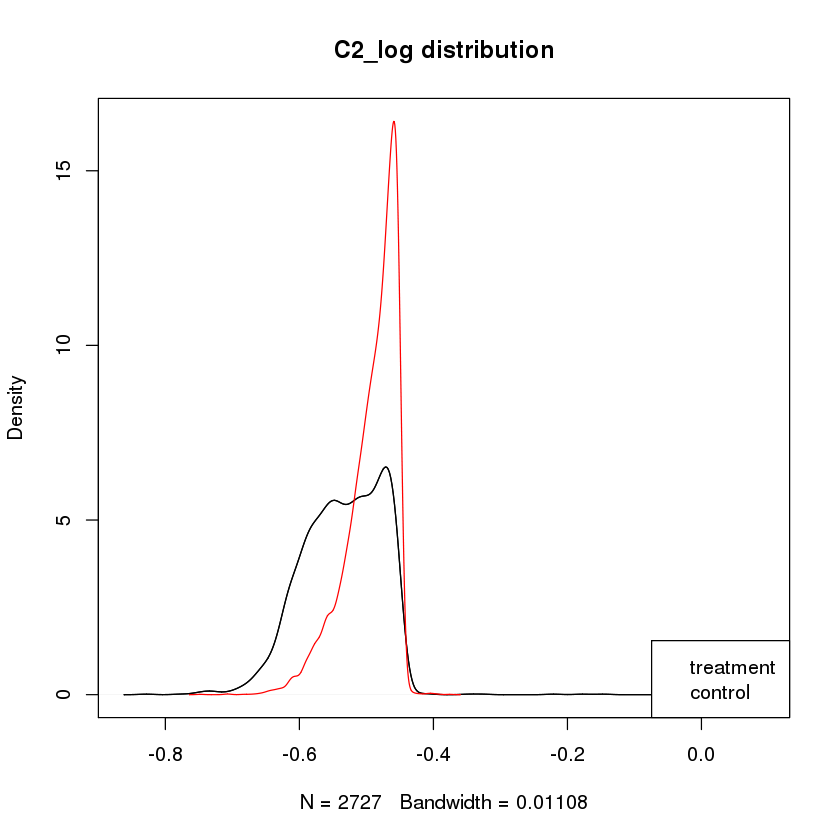

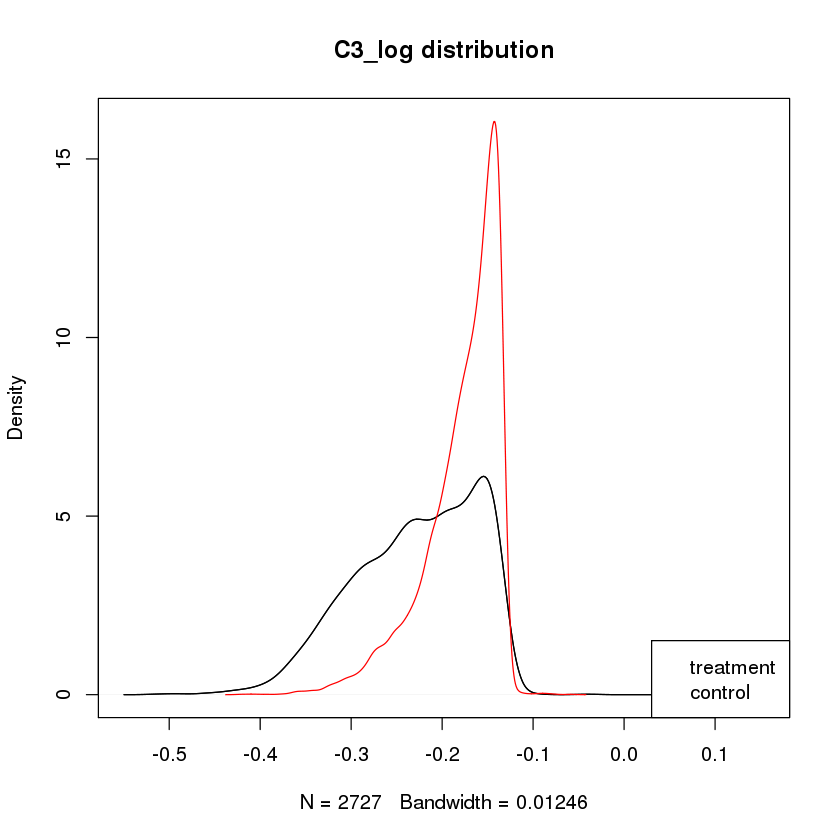

In [86]:
treatment <- "D25"
treatment_val <- 1
control_val <- 0
group_names <- c("treatment", "control")
treatment_color <- rgb(1,0,0,0.5)
control_color <- rgb(0,0,1,0.5)
cov <- paste(c('f', 'D_U', 'D_S', 'D_T', 'C2', 'C3'), '_log', sep='')
for(v in cov){
    print(v)
    treatment_stats <- matching_stats[which(matching_stats[, treatment] == treatment_val), v]
    control_stats <- matching_stats[which(matching_stats[, treatment] == control_val), v]
    all_stats <- list(treatment_stats, control_stats)
    plot.multi.dens(all_stats, v, group_names)
}

Again, most discriminating features are $f, C2, C3$.

Match on log-scaled covariates.

In [54]:
treatment <- 'D25'
cov4 <- c('f_log')
relevant_stats <- matching_stats[c(treatment, cov4, 'Y')]
m = matchit(D25 ~ f_log, method='nearest', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov4) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D25);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D25, data = matched)
print(test_results)
lm_treatment1 <- lm(Y ~ D25, data = matched)
summary(lm_treatment1)
lm_cov3 <- lm(Y ~ D25 + f_log, data = matched)
summary(lm_cov3)

[1] "covariate tests"
[1] "f_log"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -7.6719, df = 5217.1, p-value = 2.009e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1775014 -0.1052494
sample estimates:
mean in group 0 mean in group 1 
      -2.787414       -2.646039 

[1] "dependent test"

	Welch Two Sample t-test

data:  Y by D25
t = -8.4123, df = 5051.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08817143 -0.05484288
sample estimates:
mean in group 0 mean in group 1 
      0.0766410       0.1481481 




Call:
lm(formula = Y ~ D25, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14815 -0.14815 -0.07664 -0.07664  0.92336 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.076641   0.006011  12.751   <2e-16 ***
D25         0.071507   0.008500   8.412   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3139 on 5452 degrees of freedom
Multiple R-squared:  0.01281,	Adjusted R-squared:  0.01263 
F-statistic: 70.77 on 1 and 5452 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ D25 + f_log, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25919 -0.13993 -0.09722 -0.05920  1.07617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.251326   0.018253  13.769  < 2e-16 ***
D25         0.062647   0.008468   7.398 1.59e-13 ***
f_log       0.062669   0.006190  10.125  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.311 on 5451 degrees of freedom
Multiple R-squared:  0.03103,	Adjusted R-squared:  0.03068 
F-statistic:  87.3 on 2 and 5451 DF,  p-value: < 2.2e-16


Try Mahalanobis again with log-stats, since the stats are more reasonable.

In [84]:
treatment <- "D25"
cov5 <- paste(cov, '_log', sep='')
relevant_stats <- matching_stats[c(treatment, cov5, 'Y')]
m = matchit(D25 ~ f_log + D_U_log + D_S_log + D_T_log + C2_log + C3_log, 
            method='nearest', distance = 'mahalanobis', data = relevant_stats, ratio = 1)
matched = match.data(m)
print('covariate tests')
for(v in cov5) {
    print(v);
    cov_test_result <- t.test(matched[, v] ~ matched$D25);
    print(cov_test_result);
}
print('dependent test')
test_results <- t.test(Y ~ D25, data = matched)
print(test_results)
lm_treatment <- lm(Y ~ D25, data = matched)
summary(lm_treatment)
lm_cov <- lm(Y ~ D25 + f_log + D_U_log + D_S_log + D_T_log + C2_log + C3_log, data = matched)
summary(lm_cov)

[1] "covariate tests"
[1] "f_log"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = -8.9134, df = 5232.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2009914 -0.1285187
sample estimates:
mean in group 0 mean in group 1 
      -2.810794       -2.646039 

[1] "D_U_log"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 4.4503, df = 5383.6, p-value = 8.748e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001863685 0.004798412
sample estimates:
mean in group 0 mean in group 1 
      0.1084319       0.1051008 

[1] "D_S_log"

	Welch Two Sample t-test

data:  matched[, v] by matched$D25
t = 3.1465, df = 5431.1, p-value = 0.001661
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0008019284 0.0034528480
sample estimates:
mean in group 0 mean in group 1 
      0.1228744       0.12


Call:
lm(formula = Y ~ D25, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14815 -0.14815 -0.08361 -0.08361  0.91639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.083608   0.006099  13.708  < 2e-16 ***
D25         0.064540   0.008626   7.482 8.46e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3185 on 5452 degrees of freedom
Multiple R-squared:  0.01016,	Adjusted R-squared:  0.009983 
F-statistic: 55.99 on 1 and 5452 DF,  p-value: 8.465e-14



Call:
lm(formula = Y ~ D25 + f_log + D_U_log + D_S_log + D_T_log + 
    C2_log + C3_log, data = matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61880 -0.13378 -0.07465 -0.01874  1.11797 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.744736   0.107235  16.270  < 2e-16 ***
D25          0.031894   0.008163   3.907 9.45e-05 ***
f_log        0.064424   0.014116   4.564 5.13e-06 ***
D_U_log      0.761119   1.494129   0.509     0.61    
D_S_log      5.414349   0.672530   8.051 1.00e-15 ***
D_T_log     -8.606772   1.591863  -5.407 6.69e-08 ***
C2_log       3.526623   0.283740  12.429  < 2e-16 ***
C3_log      -3.017886   0.323716  -9.323  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2957 on 5446 degrees of freedom
Multiple R-squared:  0.148,	Adjusted R-squared:  0.1469 
F-statistic: 135.1 on 7 and 5446 DF,  p-value: < 2.2e-16


Conclusion: log-rescaling variables doesn't affect matching results.